### Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [21]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
df.drop(['sepal length (cm)', 'sepal width (cm)','target'],axis='columns',inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## Applying KMeans clustering algorithm

In [24]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [25]:
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,2
1,1.4,0.2,2
2,1.3,0.2,2
3,1.5,0.2,2
4,1.4,0.2,2


In [26]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [5.59583333, 2.0375    ],
       [1.462     , 0.246     ]])

In [27]:
df.cluster.unique()

array([2, 0, 1])

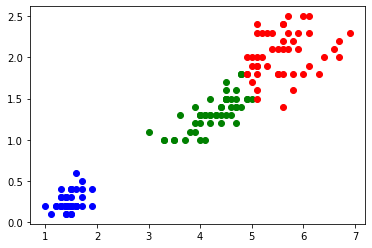

In [28]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue')

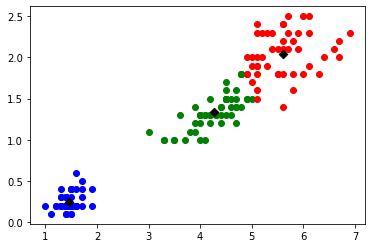

In [29]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='D',label='centroid')

## Elbow Plot

In [30]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

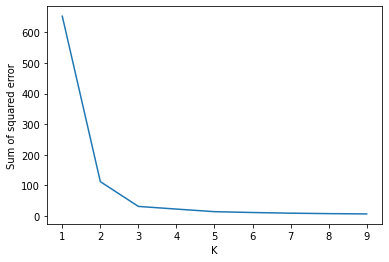

In [31]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)